In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df_index = pd.read_csv('../economic_index.csv')

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)


In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

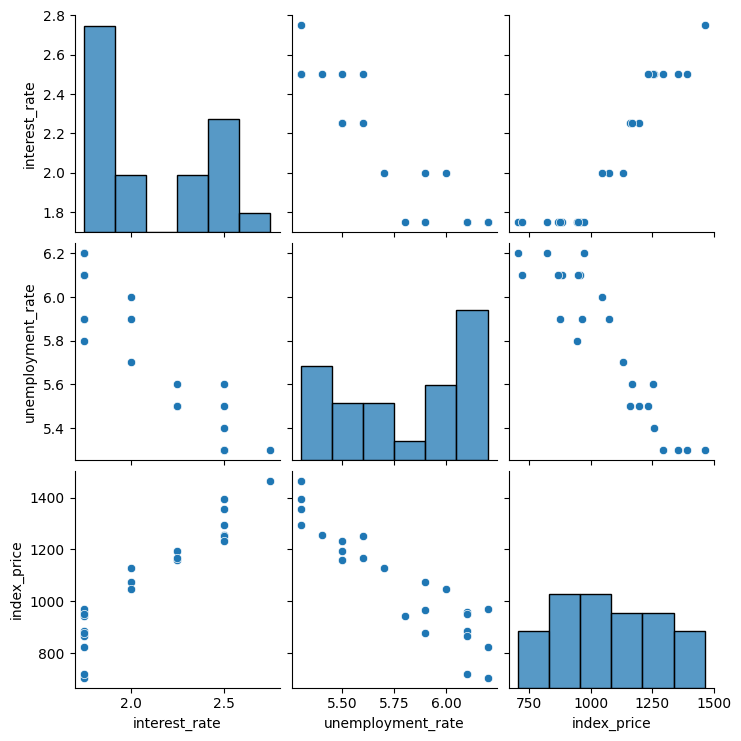

In [10]:
import seaborn as sns
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


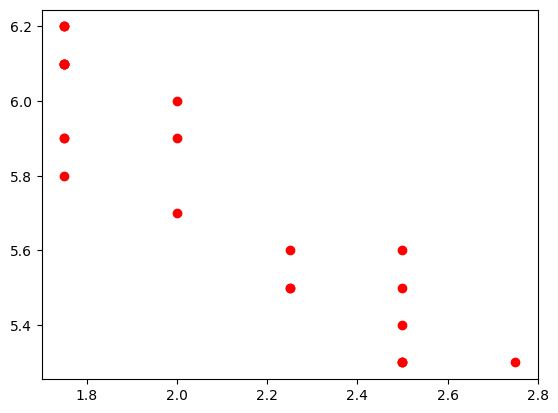

In [14]:
## visualize datapoints
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='red')


In [15]:
#independent feature dependent feature
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)    

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

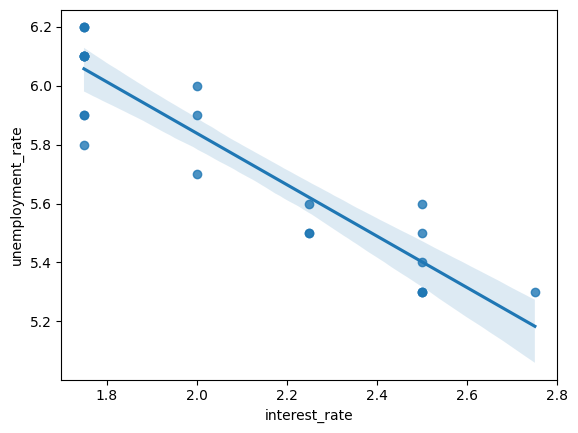

In [18]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

<Axes: xlabel='interest_rate', ylabel='index_price'>

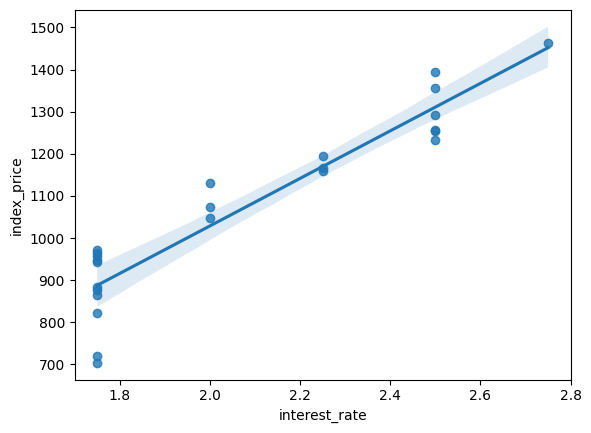

In [19]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: >

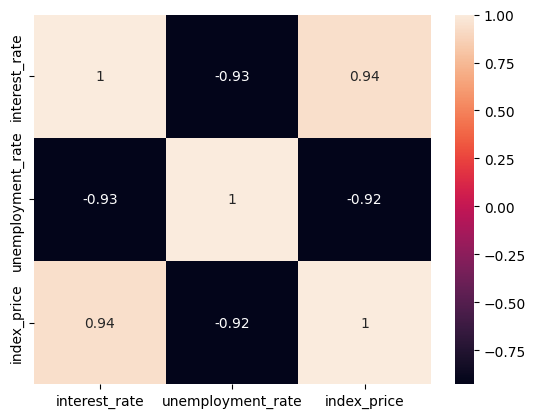

In [21]:
sns.heatmap(df_index.corr(), annot=True)

In [22]:
from sklearn.preprocessing import StandardScaler

standartScaller = StandardScaler()
X_train = standartScaller.fit_transform(X_train)
X_test = standartScaller.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linearRegressionModel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [26]:
print(np.mean(score))

0.8431354650801491


In [27]:
y_pred = linearRegressionModel.predict(X_test)

In [28]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

r_square = r2_score(y_test, y_pred)

adjusted_r_squared = 1 - (1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('r Square: ',r_square)
print('Adjusted r Square: ',adjusted_r_squared)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

r Square:  0.8278978091457145
Adjusted r Square:  0.8115071243024492
5793.762887712569
59.935781523235484
